## <center> Title: Data Wrangling in the Real World: A Case Study in Calgary </center>




##### The analysis follows the GeoJason data paradigm, with Jupyter Notebook and Colab.research.google facilitates data manipulation and visualization, while data processing. Each visualization, from spatial distribution maps to population trend charts, meticulously applies lessons from Wilke's book, ensuring clarity, coherence, and effectiveness in conveying insights.


In [ ]:
notebook_link = "https://colab.research.google.com/drive/1HCmwwyvYRPf60epua0Cx9wahcz8lG5Pt?usp=sharing"
print("Click the link below to access the notebook:")
print(notebook_link)

Click the link below to access the notebook:
https://colab.research.google.com/drive/1HCmwwyvYRPf60epua0Cx9wahcz8lG5Pt?usp=sharing


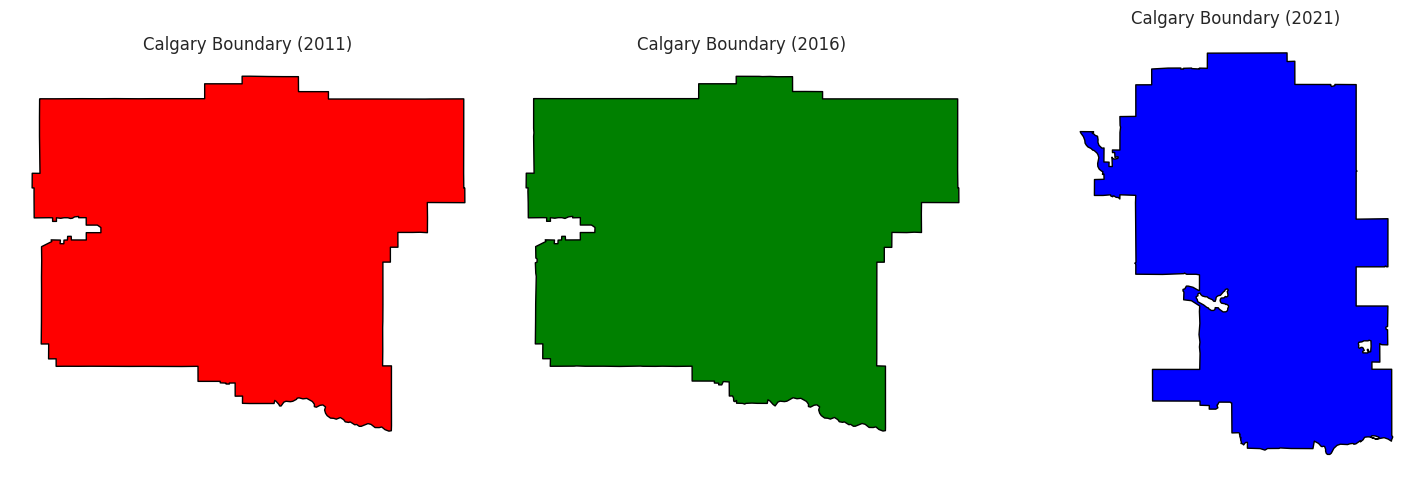

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
file_paths = [
    "/content/Cal_geos 2011.geojson",
    "/content/Cal_geos 2016.geojson",
    "/content/Cal_geos 2021.geojson"
]
colors = ['red', 'green', 'blue']
geojson_data = [gpd.read_file(file_path) for file_path in file_paths]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (year, data) in enumerate(zip([2011, 2016, 2021], geojson_data)):
    data.plot(ax=axes[i], edgecolor='black', color=colors[i])
    axes[i].set_title(f'Calgary Boundary ({year})')
    axes[i].set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
pip install folium

In [ ]:
import folium
import requests
from IPython.display import display

geojson_url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/calgary.geojson"

try:
       response = requests.get(geojson_url)
    if response.status_code == 200:
        geojson_data = response.json()
       
        calgary_map = folium.Map(location=[51.0447, -114.0719], zoom_start=10)     
        folium.GeoJson(geojson_data).add_to(calgary_map)     
        display(calgary_map)
    else:
        print("Failed to fetch GeoJSON data. Status code:", response.status_code)
except Exception as e:
    print("Error:", e)

<ipython-input-21-ec0dbb18cc80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Year', y='Population', palette='Set1', ax=axes[1, 0])
<ipython-input-21-ec0dbb18cc80>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='Population', palette='Set1', ax=axes[1, 1])


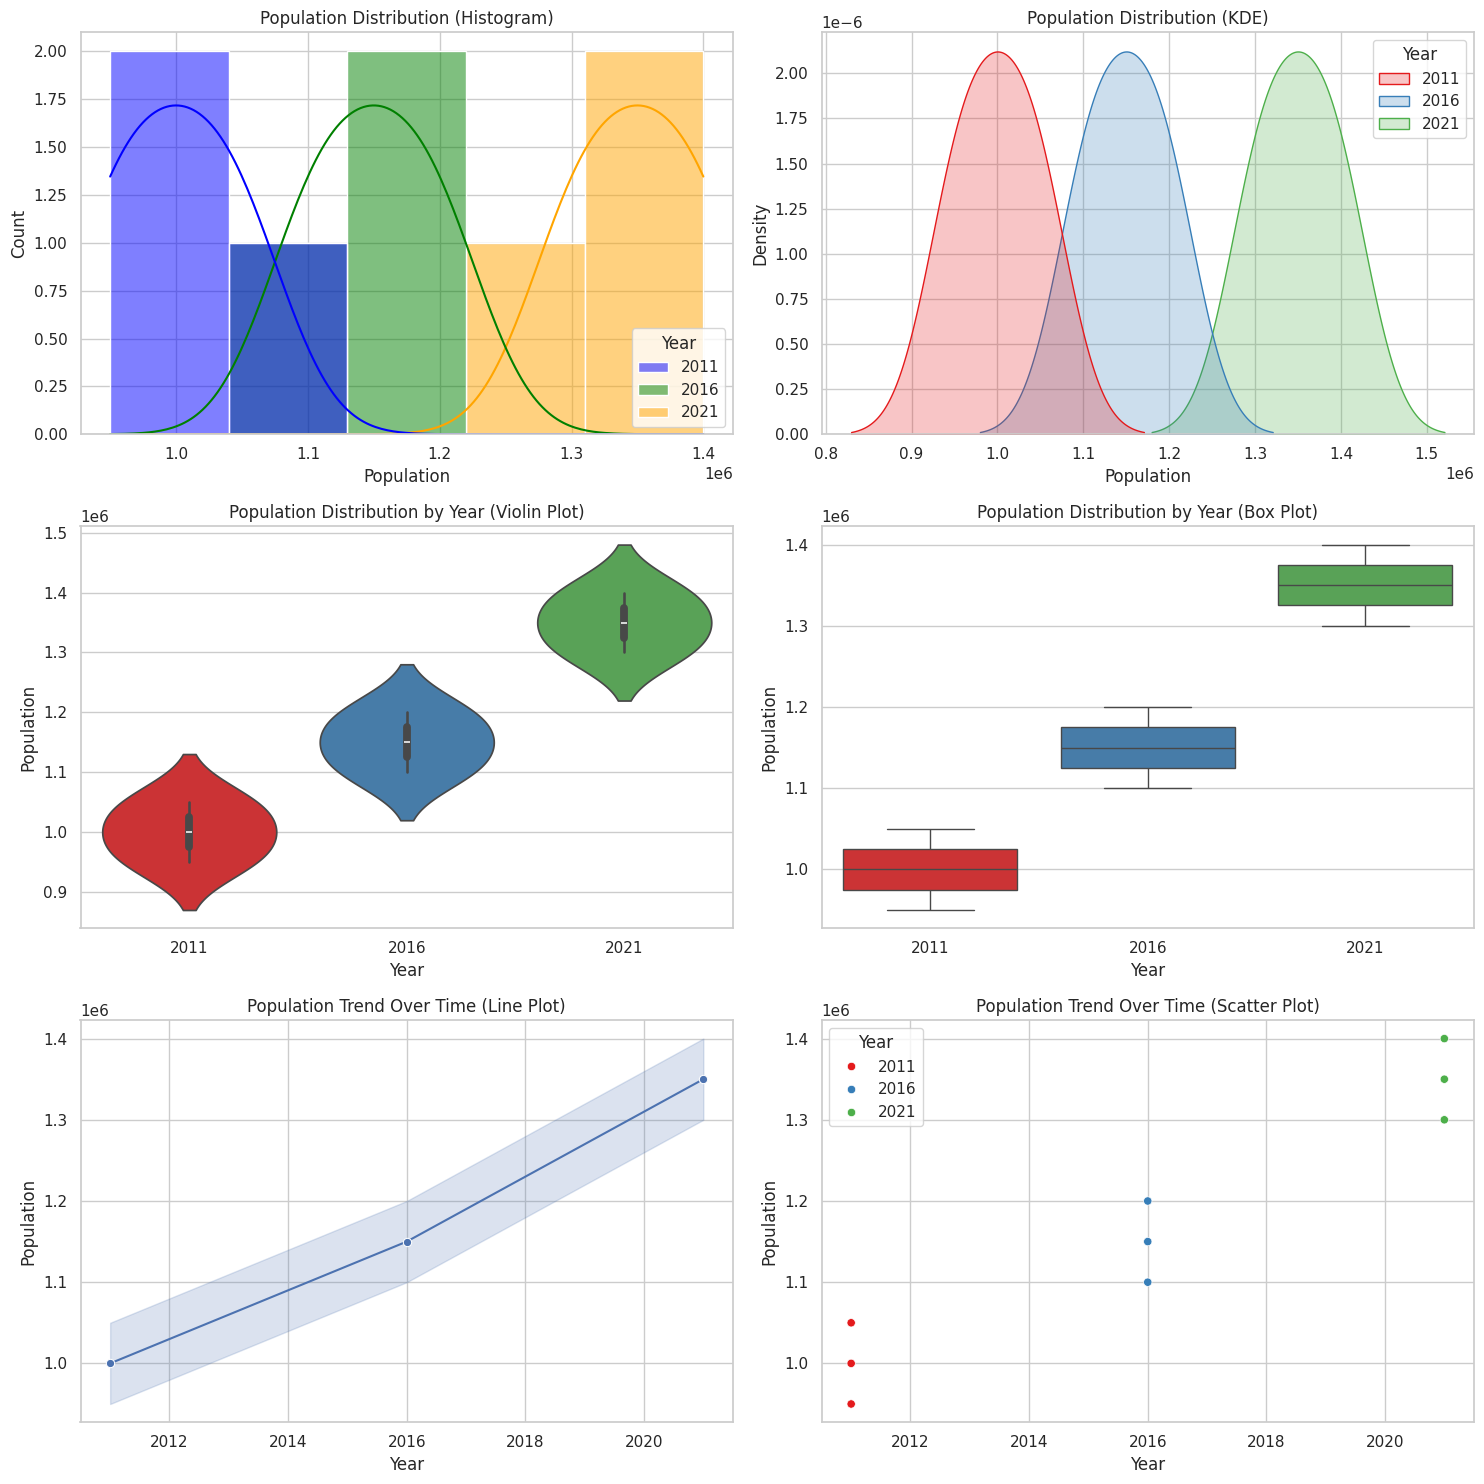

In [ ]:
import pandas as pd
import seaborn as sns
years = [2011, 2011, 2011, 2016, 2016, 2016, 2021, 2021, 2021]
population = [950000, 1000000, 1050000, 1100000, 1150000, 1200000, 1300000, 1350000, 1400000]
df = pd.DataFrame({'Year': years, 'Population': population})
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
sns.histplot(data=df, x='Population', kde=True, hue='Year', palette=['blue', 'green', 'orange'], ax=axes[0, 0])
axes[0, 0].set_title('Population Distribution (Histogram)')
sns.kdeplot(data=df, x='Population', fill=True, hue='Year', palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('Population Distribution (KDE)')
sns.violinplot(data=df, x='Year', y='Population', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Population Distribution by Year (Violin Plot)')
sns.boxplot(data=df, x='Year', y='Population', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Population Distribution by Year (Box Plot)')
sns.lineplot(data=df, x='Year', y='Population', marker='o', ax=axes[2, 0])
axes[2, 0].set_title('Population Trend Over Time (Line Plot)')
sns.scatterplot(data=df, x='Year', y='Population', hue='Year', palette='Set1', ax=axes[2, 1])
axes[2, 1].set_title('Population Trend Over Time (Scatter Plot)')
axes[2, 1].legend(title='Year')
plt.tight_layout()
plt.show()


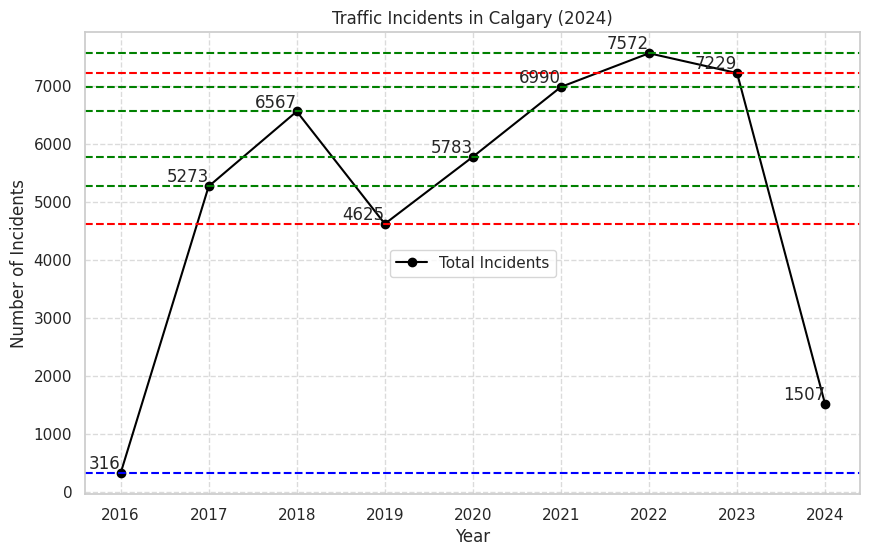

In [ ]:
file_path = "/content/Traffic_Incidents_Calgary_2024.csv"
traffic_data = pd.read_csv(file_path)
traffic_data['START_DT'] = pd.to_datetime(traffic_data['START_DT'])
incident_count_by_year = traffic_data.groupby(traffic_data['START_DT'].dt.year).size()
incident_count_diff = incident_count_by_year.diff()
colors = ['green' if diff > 0 else 'red' if diff < 0 else 'blue' for diff in incident_count_diff]
plt.figure(figsize=(10, 6))
plt.plot(incident_count_by_year.index, incident_count_by_year.values, marker='o', color='black', label='Total Incidents')
for i, year in enumerate(incident_count_by_year.index):
    plt.text(year, incident_count_by_year.values[i], f"{incident_count_by_year.values[i]}", ha='right', va='bottom')
plt.title('Traffic Incidents in Calgary (2024)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(incident_count_by_year.index)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
for i in range(len(incident_count_by_year) - 1):
    plt.axhline(y=incident_count_by_year.values[i], color=colors[i], linestyle='--')
plt.show()


In [ ]:
traffic_data.columns

Index(['INCIDENT INFO', 'DESCRIPTION', 'START_DT', 'MODIFIED_DT', 'QUADRANT',
       'Longitude', 'Latitude', 'Count', 'id', 'Point'],
      dtype='object')

In [ ]:
if 'Hour' not in traffic_data.columns:
    print('The variable Hour does not exist in the traffic_data DataFrame.')

The variable Hour does not exist in the traffic_data DataFrame.


In [ ]:
if 'Hour' not in traffic_data.columns:
    traffic_data['Hour'] = pd.to_datetime(traffic_data['START_DT']).dt.hour

<ipython-input-113-37d6f39b7809>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=traffic_data, palette='plasma')


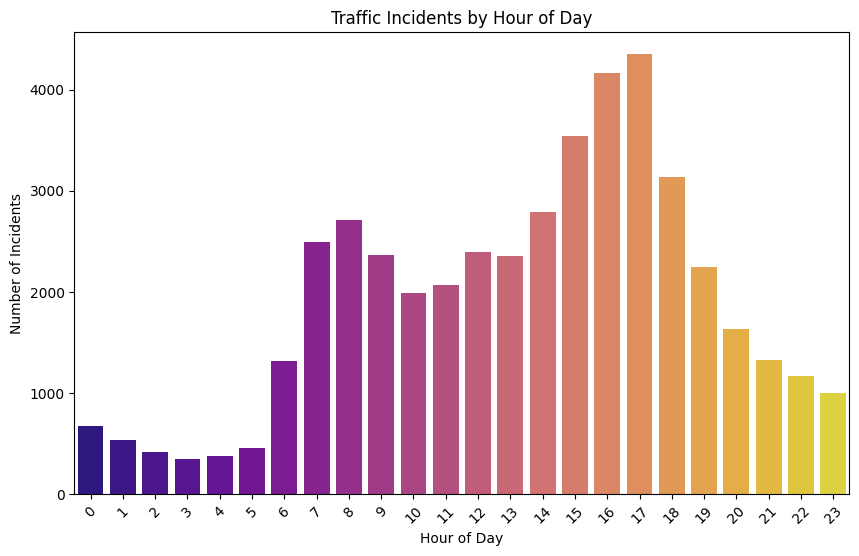

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=traffic_data, palette='plasma')
plt.title('Traffic Incidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

The analysis of traffic incidents by the hour of the day provides valuable insights into peak periods of activity and potential risk factors contributing to accidents, guiding the formulation of tailored traffic management strategies.

<ipython-input-95-3119df9cdd92>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='DESCRIPTION', data=traffic_data, order=traffic_data['DESCRIPTION'].value_counts().index[:10], palette='viridis')


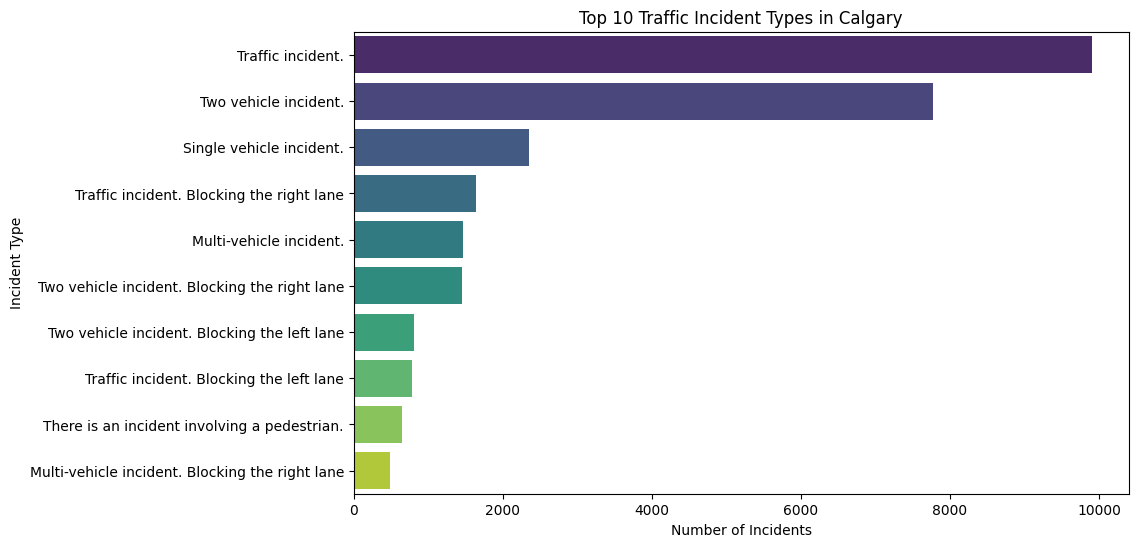

In [ ]:
# Load the data
file_path = "/content/Traffic_Incidents_Calgary_2024.csv"
traffic_data = pd.read_csv(file_path)

# Visualization 1: Bar Chart of Incident Types
plt.figure(figsize=(10, 6))
sns.countplot(y='DESCRIPTION', data=traffic_data, order=traffic_data['DESCRIPTION'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Traffic Incident Types in Calgary')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Type')
plt.show()

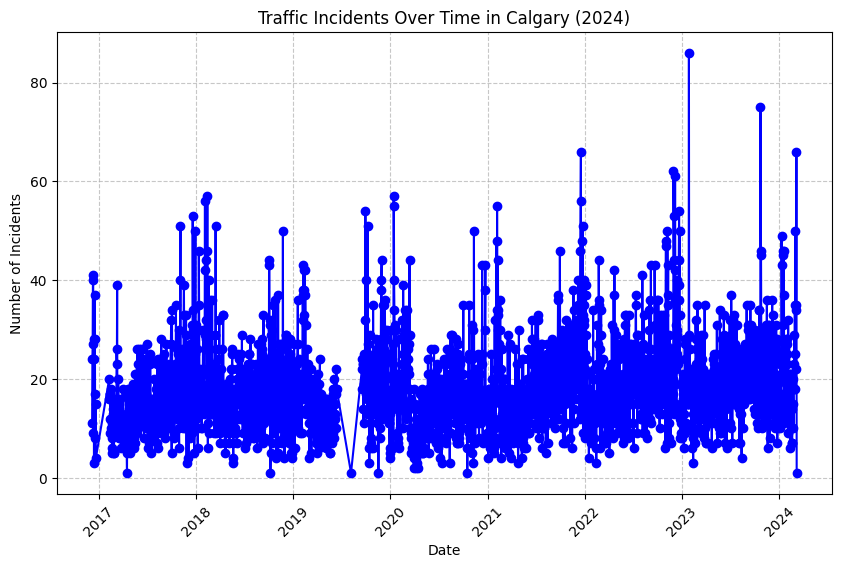

In [ ]:
# Visualization 2: Line Plot of Incidents Over Time
traffic_data['START_DT'] = pd.to_datetime(traffic_data['START_DT'])
incident_count_by_date = traffic_data['START_DT'].dt.date.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(incident_count_by_date.index, incident_count_by_date.values, marker='o', color='blue')
plt.title('Traffic Incidents Over Time in Calgary (2024)')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

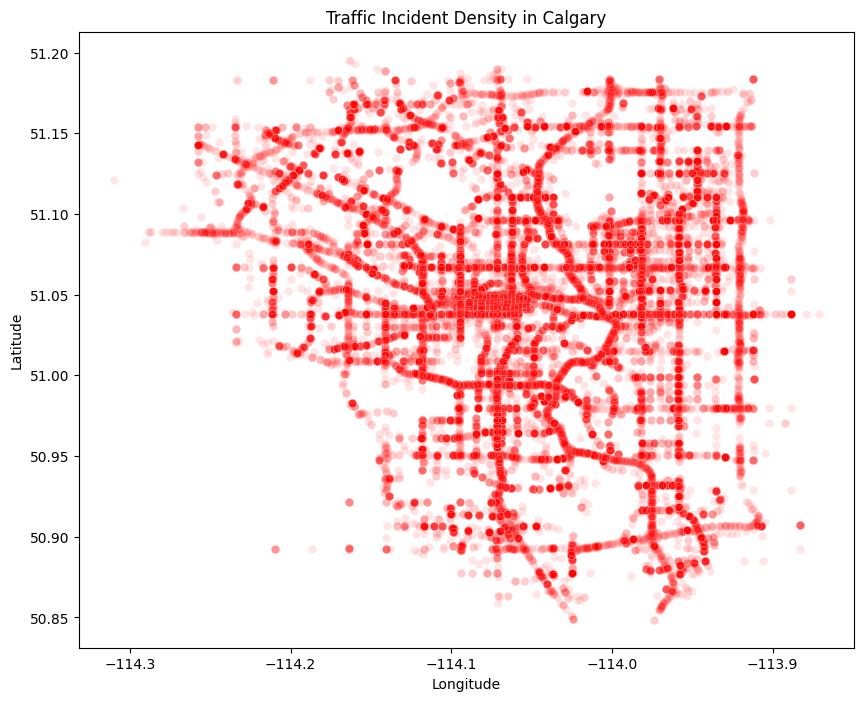

In [ ]:
# Visualization 3: Heatmap of Incident Density
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=traffic_data, alpha=0.1, color='red')
plt.title('Traffic Incident Density in Calgary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In this analysis, I create a heatmap visualization to illustrate the density of traffic incidents throughout Calgary. Utilizing longitude and latitude coordinates, the heatmap effectively portrays the spatial distribution of incidents across the city. By employing red scatterplot points with adjusted opacity, the visualization highlights regions of heightened incident density, shedding light on traffic hotspots and areas that may require focused intervention or infrastructure enhancements. This visualization is a valuable asset for urban planners, policymakers, and emergency responders, empowering them to allocate resources strategically and devise targeted traffic management strategies to bolster safety and mobility across Calgary.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
!pip install pandas

In [ ]:
file_path = "/content/Traffic_Incidents_Calgary_2024.csv"
traffic_data = pd.read_csv(file_path)
print(traffic_data)

                                           INCIDENT INFO  \
0              Westbound 16 Avenue at Deerfoot Trail NE    
1                             11 Avenue and 4 Street SW    
2                        68 Street and Memorial Drive E    
3                  Eastbound 16 Avenue and 36 Street NE    
4                         Barlow Trail and 61 Avenue SE    
...                                                  ...   
45857                  68 Street and Abbeydale Drive NE    
45858   Eastbound Stoney Trail to Southbound 14 Stree...   
45859                        14 Street and 11 Avenue NW    
45860             194 Avenue and Silverton Glen Gate SW    
45861              Redstone Boulevard and 128 Avenue NE    

                                             DESCRIPTION  \
0      Stalled vehicle.  Partially blocking the right...   
1              Traffic incident. Blocking multiple lanes   
2                                      Traffic incident.   
3           Traffic incident. Blocking 

In [ ]:
if 'INCIDENT INFO' in traffic_data.columns:
   
    traffic_data['INCIDENT INFO'] = pd.to_numeric(traffic_data['INCIDENT INFO'], errors='coerce')
else:
   
    print("Column 'INCIDENT INFO' not found in the DataFrame")

In [ ]:
print(traffic_data.columns)

with open(file_path, 'r') as f:
    header = f.readline().strip().split(',')
    print(header)

Index(['INCIDENT INFO', 'DESCRIPTION', 'START_DT', 'MODIFIED_DT', 'QUADRANT',
       'Longitude', 'Latitude', 'Count', 'id', 'Point'],
      dtype='object')
['INCIDENT INFO', 'DESCRIPTION', 'START_DT', 'MODIFIED_DT', 'QUADRANT', 'Longitude', 'Latitude', 'Count', 'id', 'Point']


In [ ]:


traffic_data['QUADRANT'] = traffic_data['QUADRANT'].replace('[^0-9]', np.nan, regex=True)
traffic_data['QUADRANT'] = pd.to_numeric(traffic_data['QUADRANT'], errors='coerce')

In [ ]:
import numpy as np
import pandas as pd
traffic_data = pd.read_csv("/content/Traffic_Incidents_Calgary_2024.csv")
traffic_data['QUADRANT'] = traffic_data['QUADRANT'].replace('[^0-9]', np.nan, regex=True)
traffic_data['QUADRANT'] = pd.to_numeric(traffic_data['QUADRANT'], errors='coerce')

In [ ]:
print(traffic_data[['DESCRIPTION', 'QUADRANT', 'Longitude', 'Latitude', 'INCIDENT INFO']].head())

                                         DESCRIPTION QUADRANT   Longitude  \
0  Stalled vehicle.  Partially blocking the right...       NE -114.026687   
1          Traffic incident. Blocking multiple lanes       SW -114.071481   
2                                  Traffic incident.       NE -113.935553   
3       Traffic incident. Blocking the left shoulder       NE -113.989219   
4                                  Traffic incident.       SE -113.985727   

    Latitude                               INCIDENT INFO  
0  51.067485   Westbound 16 Avenue at Deerfoot Trail NE   
1  51.042624                  11 Avenue and 4 Street SW   
2  51.052474             68 Street and Memorial Drive E   
3  51.067086       Eastbound 16 Avenue and 36 Street NE   
4  50.998727              Barlow Trail and 61 Avenue SE   


In [ ]:
import pandas as pd
traffic_data = pd.read_csv("/content/Traffic_Incidents_Calgary_2024.csv")
traffic_data = traffic_data[pd.to_numeric(traffic_data['DESCRIPTION'], errors='coerce').notnull()]
correlation_matrix = traffic_data[['DESCRIPTION', 'QUADRANT', 'Longitude', 'Latitude']].corr()
print(correlation_matrix)

             DESCRIPTION  QUADRANT  Longitude  Latitude
DESCRIPTION          NaN       NaN        NaN       NaN
QUADRANT             NaN       NaN        NaN       NaN
Longitude            NaN       NaN        NaN       NaN
Latitude             NaN       NaN        NaN       NaN


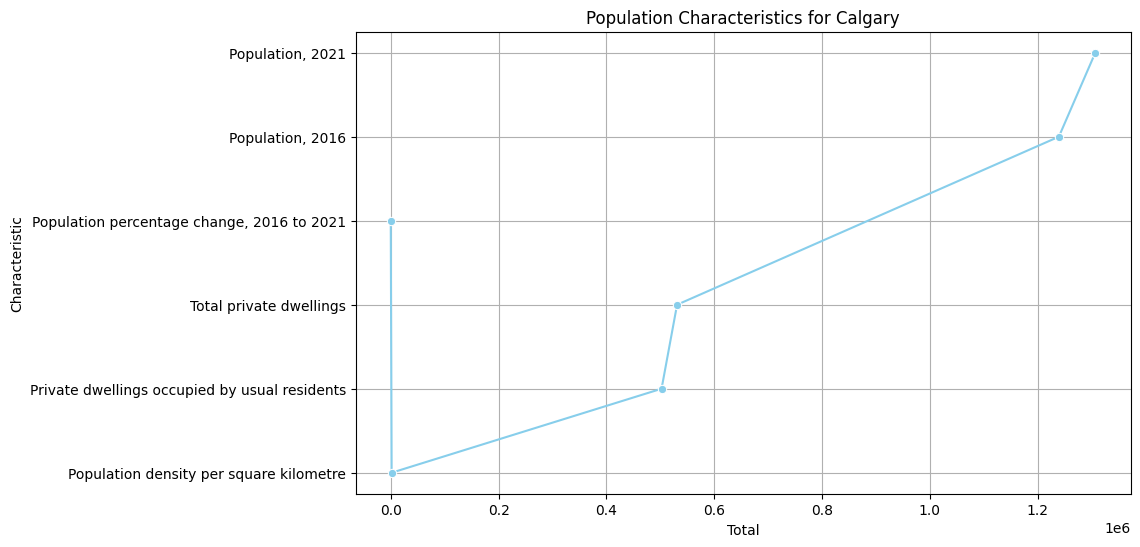

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Topic": ["Population and dwellings", "Population and dwellings", "Population and dwellings",
              "Population and dwellings", "Population and dwellings", "Population and dwellings"],
    "Characteristic": ["Population, 2021", "Population, 2016", "Population percentage change, 2016 to 2021",
                        "Total private dwellings", "Private dwellings occupied by usual residents",
                        "Population density per square kilometre"],
    "Note": [1, 1, "", 2, 3, ""],
    "Total": [1306784, 1239220, 5.5, 531062, 502301, 1592.4],
    "Total_Flag": ["", "", "", "", "", ""]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Total', y='Characteristic', data=df, marker='o', color='skyblue')
plt.xlabel('Total')
plt.ylabel('Characteristic')
plt.title('Population Characteristics for Calgary')
plt.grid()
plt.show()


In [ ]:
# activate R magic
%load_ext rpy2.ipython

In [ ]:
!jupyter-kernelspec list

Available kernels:
  ir         /usr/local/share/jupyter/kernels/ir
  python3    /usr/local/share/jupyter/kernels/python3


In [ ]:
set_cancensus_api_key('<CensusMapper_ff33a3d61364ab7961fefb0c3a62d4ef>', install = TRUE)

Your API key has been stored in your .Renviron and can be accessed by Sys.getenv("CM_API_KEY").



In [ ]:
install.packages("cancensus", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘lazyeval’, ‘terra’, ‘gridExtra’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘e1071’, ‘wk’, ‘crosstalk’, ‘htmlwidgets’, ‘leaflet.providers’, ‘png’, ‘raster’, ‘viridis’, ‘colourvalues’, ‘googlePolylines’, ‘jsonify’, ‘Rcpp’, ‘shiny’, ‘sfheaders’, ‘BH’, ‘geometries’, ‘interleave’, ‘rapidjsonr’, ‘spatialwidget’, ‘classInt’, ‘s2’, ‘units’, ‘leaflet’, ‘mapdeck’, ‘sp’, ‘sf’, ‘geojsonsf’, ‘lwgeom’


Warning message in install.packages("cancensus", dependencies = TRUE):
“installation of package ‘jsonify’ had non-zero exit status”
Warning message in install.packages("cancensus", dependencies = TRUE):
“installation of package ‘geometries’ had non-zero exit status”
Warning message in install.packages("cancensus", dependencies = TRUE):
“installation of package ‘s2’ had non-zero exit status”
Warning message in install.packages("cancensus", dependencies = TRUE):
“i